# Modelo K-MEANS World Happines

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time                          # To time processes 
import warnings                      # To suppress warnings
import matplotlib.pyplot as plt      # For Graphics
import seaborn as sns
from sklearn import cluster, mixture # For clustering 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
#se carga el data set
df_happiness = pd.read_csv('./world-happiness/master.csv')
df_happiness

,Year,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score,Happiness Rank
0,2015,Switzerland,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587,1
1,2015,Iceland,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561,2
2,2015,Denmark,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527,3
3,2015,Norway,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522,4
4,2015,Canada,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427,5
...,...,...,...,...,...,...,...,...,...,...,...
760,2019,Yemen,Middle East and Northern Africa,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,3.380,151
761,2019,Rwanda,Sub-Saharan Africa,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,3.334,152
762,2019,Tanzania,Sub-Saharan Africa,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,3.231,153
763,2019,Afghanistan,Southern Asia,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,3.203,154


In [4]:
df_happiness.isnull().any()

Year                             False
Country                          False
Region                           False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)     True
Generosity                       False
Happiness Score                  False
Happiness Rank                   False
dtype: bool

In [5]:
#identify the NA value
df_happiness[df_happiness['Trust (Government Corruption)'].isna()]

,Year,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score,Happiness Rank
484,2018,United Arab Emirates,Middle East and Northern Africa,2.096,0.776,0.67,0.284,NaN,0.186,6.774,20


In [6]:
#Replace the NaN value with the mean of all values from each year for United Arab Emirates.
df_UAE = df_happiness[df_happiness['Country'] == 'United Arab Emirates']
df_UAE['Trust (Government Corruption)'].mean()  #find mean
# replace the value to mean
df_happiness.fillna(0.311982, inplace=True)
df_happiness.isnull().any()

Year                             False
Country                          False
Region                           False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Happiness Score                  False
Happiness Rank                   False
dtype: bool

In [7]:
df_happiness=df_happiness.rename(columns={'Economy (GDP per Capita)':'Economy_GDP_Per_Capita','Health (Life Expectancy)':'Health_Life_Expectancy','Trust (Government Corruption)':'Trust_Government_Corruption','Happiness Rank':'Happiness_Rank','Happiness Score':'Happiness_Score'})
df_happiness.columns

Index(['Year', 'Country', 'Region', 'Economy_GDP_Per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption',
       'Generosity', 'Happiness_Score', 'Happiness_Rank'],
      dtype='object')

### POSIBLEMENTE NO SIRVA

In [8]:
# Method for K means clustering
def kmeans_Clustering(data,numberOfClusters):
       #Initializing Kmeans.cluster object was imported from sklearn in begining.
       kmeans = cluster.KMeans(n_clusters=numberOfClusters)
       # Fitting the input data and getting the cluster labels
       cluster_labels = kmeans.fit_predict(data)
       # Getting the cluster centers
       cluster_centers = kmeans.cluster_centers_
       cluster_centers.shape
       return cluster_labels,cluster_centers

In [13]:
#Plot the cluster
def plot_cluster(labels,centers,df_wh):
    #Getting number of columns
    numOfDimensions = df_wh.columns.size
    #Number of plots required for 6 dimension with 2 dimensions in each plot
    numberOfPlots = int(numOfDimensions/2)
    #Number of rows and columns for subplots
    fig,ax = plt.subplots(numberOfPlots,1, figsize=(10,10))
    for i,j in zip(range(0,numOfDimensions,2),range(0,numberOfPlots)):
         ax[j].scatter(df_wh.iloc[:, i], df_wh.iloc[:, i+1], c=labels, s=50, cmap='viridis')
         ax[j].scatter(centers[:,i], centers[:, i+1], c='red', s=200, alpha=1)
    plt.subplots_adjust(bottom=-0.5, top=1.5)
    plt.show()

**We will do clustering of data using K means method and we will create plots for clustered data**

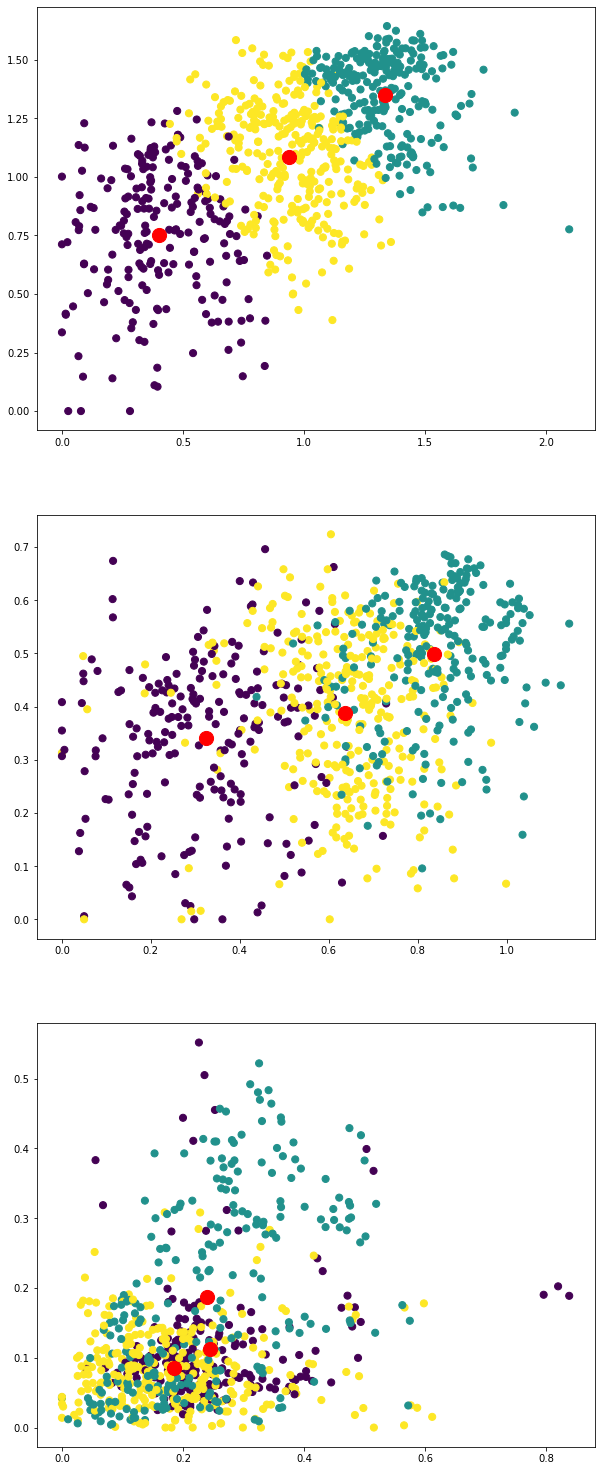

In [14]:
df_happiness=df_happiness.sort_values('Happiness_Rank',ascending=False)
df_wh=df_happiness.filter(['Country','Economy_GDP_Per_Capita','Family','Health_Life_Expectancy','Freedom','Generosity','Trust_Government_Corruption'])
df_wh=df_wh.set_index('Country')
labels,centers = kmeans_Clustering(df_wh,3)     
plot_cluster(labels,centers,df_wh)

**Spectral Clustering - Objective of spectral clustering is to cluster data that which is connected but not necessarily clustered within convex boundaries.Spectral clustering use the affnity matrix to detemine the connectivity of data for clustering**

In [117]:
def spectral_Clustering(data,numberOfClusters):
       #Initializing cluster.cluster object was imported from sklearn in begining.
       spectral = cluster.SpectralClustering(n_clusters=numberOfClusters,affinity="nearest_neighbors",eigen_solver='arpack')
       # Fitting the input data and getting the cluster labels
       cluster_labels = spectral.fit_predict(data)
       # Getting the cluster centers
       return cluster_labels

In [118]:
#Plot the cluster without center
def plot_clusterWithoutCenter(labels,df_wh):
    #Getting number of columns
    numOfDimensions = df_wh.columns.size
    #Number of plots required for 6 dimension with 2 dimensions in each plot
    numberOfPlots = int(numOfDimensions/2)
    #Number of rows and columns for subplots
    fig,ax = plt.subplots(numberOfPlots,1, figsize=(10,10))
    for i,j in zip(range(0,numOfDimensions,2),range(0,numberOfPlots)):
         ax[j].scatter(df_wh.iloc[:, i], df_wh.iloc[:, i+1], c=labels, s=50, cmap='viridis')
    plt.subplots_adjust(bottom=-0.5, top=1.5)
    plt.show()

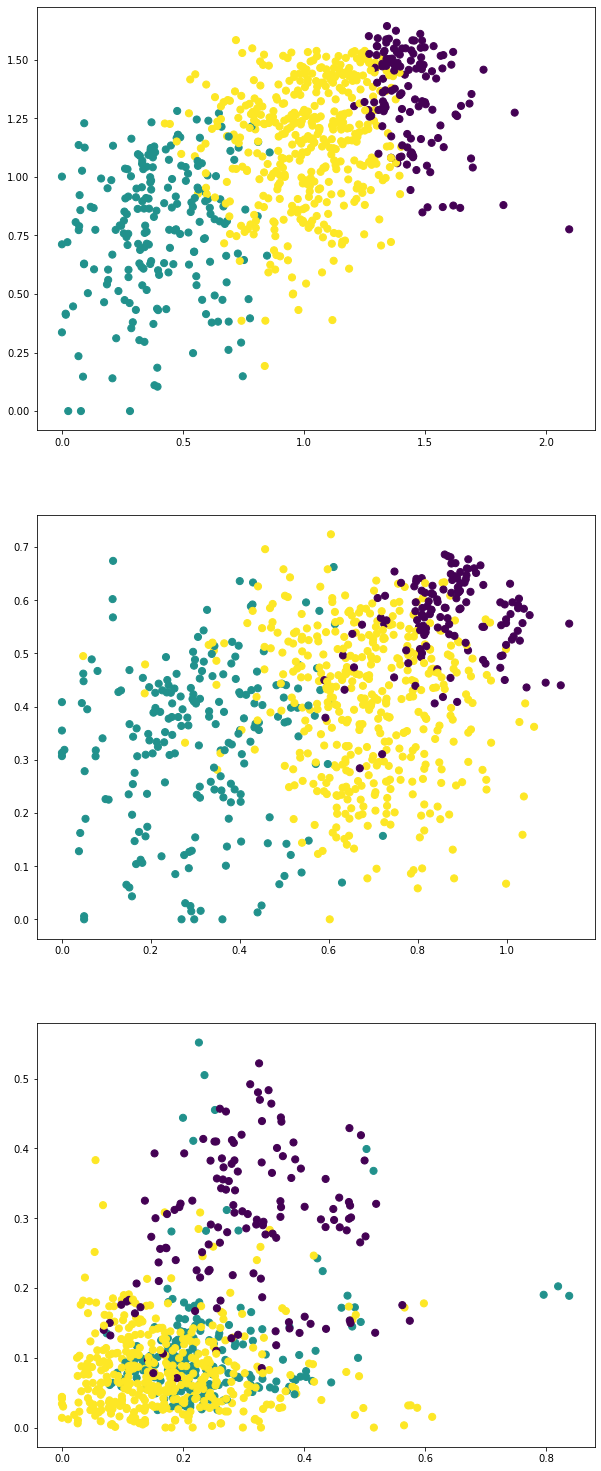

In [119]:
# graficas resultantes
labels = spectral_Clustering(df_wh,3)    
plot_clusterWithoutCenter(labels,df_wh)

**Affinity Propagation- Affinity Propagation works by setting up a factor graph that describes the objective function used to identify exemplars and cluster data. Each item in a dataset can be mapped into Euclidean space using feature values. Affinity propagation depends on a matrix containing Euclidean distances between data points. Since the matrix can quickly become quite large, we should be careful not to take up too much memory**

In [120]:
def affinityPropagation_Clustering(data):
        affinity_propagation =  cluster.AffinityPropagation(preference=-10,damping=0.5,affinity='euclidean')
        af = affinity_propagation.fit(data)
        cluster_centers_indices = af.cluster_centers_indices_
        labels = af.labels_
        n_clusters_ = len(cluster_centers_indices)
        #print(n_clusters_)
        return affinity_propagation.predict(data),n_clusters_,cluster_centers_indices

In [121]:
from itertools import cycle
plt.close('all')
plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

def drawAffinityCluster(labels,n_clusters_,cluster_centers_indices):
     #Getting number of columns
     numOfDimensions = df_wh.columns.size
     #Number of plots required for 6 dimension with 2 dimensions in each plot
     numberOfPlots = int(numOfDimensions/2)
     #Number of rows and columns for subplots
     fig,ax = plt.subplots(numberOfPlots,1, figsize=(10,10))
     for column,plot in zip(range(0,numOfDimensions,2),range(0,numberOfPlots)):
        for cluster, col in zip(range(n_clusters_), colors):
            # This will provide cluster center for both clusters for all dimensions
            cluster_center = df_wh.iloc[cluster_centers_indices[cluster],:]
            #This will plot cluster center for first 2 dimensions
            ax[plot].plot(cluster_center[column], cluster_center[column+1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)
            # we will traverse through cluster labels and if cluster label is equal cluster 0 then it will 
            # plot data point for tht and if cluster label is equal to cluster number 1(k) then it will plot cluster
            # 1 data
            for i in range(labels.size):
                if cluster==labels[i]:
                    ax[plot].plot(df_wh.iloc[i, column], df_wh.iloc[i, column+1], col + '.')
                    # This will draw affinity line between center and data point
                    ax[plot].plot([cluster_center[column], df_wh.iloc[i, column]], [cluster_center[column+1], df_wh.iloc[i, column+1]], col)

     plt.title('Estimated number of clusters: %d' % n_clusters_)
     plt.show()

<Figure size 432x288 with 0 Axes>

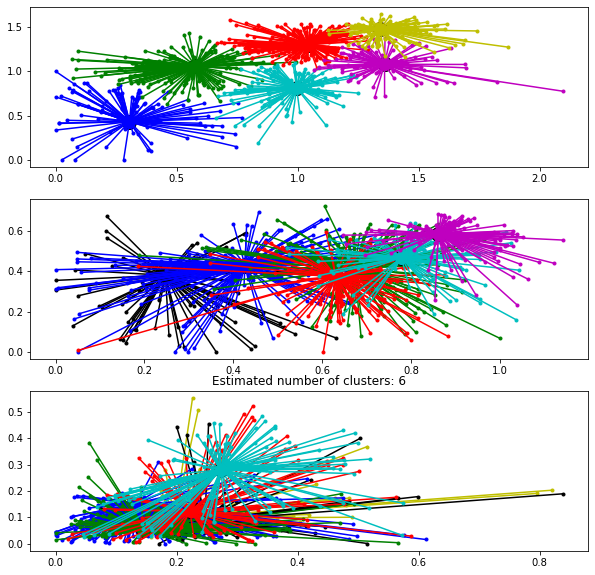

In [122]:
# resultado
labels,n_clusters_,cluster_centers_indices = affinityPropagation_Clustering(df_wh)    
drawAffinityCluster(labels,n_clusters_,cluster_centers_indices)

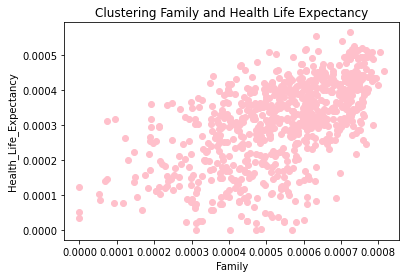

In [17]:
X = data_scaled[["Family","Health_Life_Expectancy"]]
plt.scatter(X["Family"],X["Health_Life_Expectancy"],c='pink')
plt.title("Clustering Family and Health Life Expectancy")
plt.xlabel("Family")
plt.ylabel("Health_Life_Expectancy")
plt.show()

[[0.00071494 0.00040945]
 [0.00040695 0.00031839]
 [0.0004944  0.00013624]
 [0.00057931 0.00034931]
 [0.00022921 0.00015606]]


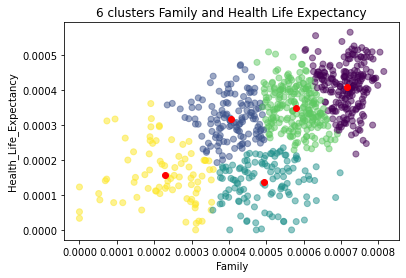

In [20]:


kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Family'], X['Health_Life_Expectancy'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title("6 clusters Family and Health Life Expectancy")
plt.xlabel("Family")
plt.ylabel("Health_Life_Expectancy")
plt.show()

[[0.00023073 0.00015488]
 [0.00049616 0.00013764]
 [0.00071494 0.00040945]
 [0.00040695 0.00031839]
 [0.00057933 0.00034986]]


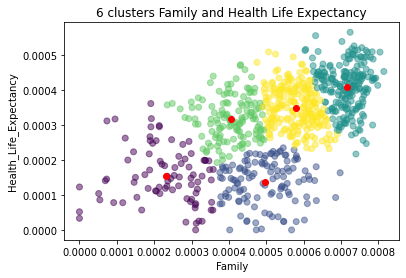

In [23]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Family'], X['Health_Life_Expectancy'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title("6 clusters Family and Health Life Expectancy")
plt.xlabel("Family")
plt.ylabel("Health_Life_Expectancy")
plt.show()

# POSIBLEMENTE LO FIJO

### **Scaling dataset y función codo**

In [53]:
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans

wh1 = df_happiness[['Happiness_Score','Economy_GDP_Per_Capita','Family','Health_Life_Expectancy', 'Freedom', 
          'Generosity','Trust_Government_Corruption']] #Subsetting the data
#Scaling of data
ss = StandardScaler()
ss.fit_transform(wh1)

array([[-2.27747856, -1.76952966, -2.88264531, ..., -0.30435198,
        -0.42134033, -0.17443032],
       [-2.21864266, -2.24998392, -2.03657341, ..., -1.9097787 ,
        -0.17396144, -0.23731841],
       [-2.21864266, -2.11828013, -2.59296564, ..., -2.40113598,
        -0.12823777, -0.29776242],
       ...,
       [ 1.91056828,  1.72811966,  1.39056224, ...,  1.46331131,
         1.16398181,  1.78698093],
       [ 1.99525616,  0.95428672,  1.56987245, ...,  1.76071893,
        -0.13554706,  2.51114496],
       [ 1.95514077,  1.1816441 ,  0.82630919, ...,  1.6600331 ,
         0.63420248,  2.76288533]])

In [36]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

In [55]:
clust_labels, cent = doKmeans(wh1, 4)
dfkmeans = pd.DataFrame(clust_labels)
wh1.insert((wh1.shape[1]),'dfkmeans',dfkmeans)

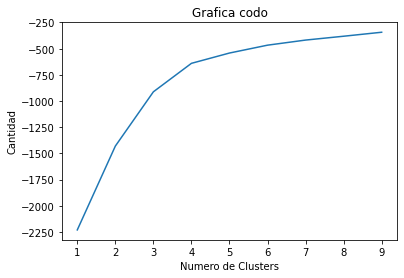

In [56]:
X = np.array(wh1)
NumberClusters = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in NumberClusters]
kmeans
cantidad = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
cantidad
plt.plot(NumberClusters,cantidad)
plt.xlabel('Numero de Clusters')
plt.ylabel('Cantidad')
plt.title('Grafica codo')
plt.show()

### Graficando

In [62]:
# la data se normaliza
df=df_happiness.drop(['Country','Region'],axis=1)
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled

,Year,Economy_GDP_Per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Happiness_Score,Happiness_Rank
0,0.996939,0.000103,0.000069,0.000141,0.000180,0.000053,0.000083,0.001405,0.078172
1,0.996977,0.000008,0.000206,0.000111,0.000059,0.000050,0.000098,0.001437,0.077680
2,0.996980,0.000034,0.000116,0.000078,0.000021,0.000047,0.000100,0.001437,0.077642
3,0.997015,0.000328,0.000235,0.000357,0.000078,0.000094,0.000233,0.001487,0.077188
4,0.997024,0.000045,0.000310,0.000072,0.000032,0.000038,0.000074,0.001435,0.077074
...,...,...,...,...,...,...,...,...,...
760,0.999992,0.000715,0.000577,0.000394,0.000287,0.000220,0.000179,0.003733,0.000496
761,0.999992,0.000664,0.000786,0.000488,0.000295,0.000195,0.000076,0.003848,0.000495
762,0.999992,0.000801,0.000760,0.000395,0.000315,0.000157,0.000179,0.003737,0.000496
763,0.999992,0.000647,0.000789,0.000433,0.000337,0.000195,0.000100,0.003782,0.000496


[[0.00024548 0.00017552]
 [0.00049718 0.00014534]
 [0.00068348 0.00038943]
 [0.00047891 0.0003427 ]]


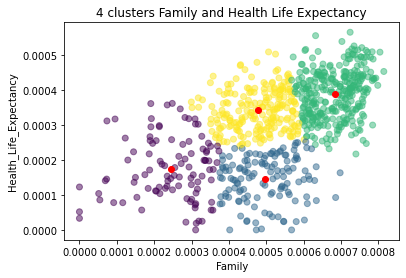

In [63]:
X = data_scaled[["Family","Health_Life_Expectancy"]]

kmeans = KMeans(n_clusters=4).fit(X) # se eligen 4 cluster segun lo encontrado en la función codo
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Family'], X['Health_Life_Expectancy'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title("4 clusters Family and Health Life Expectancy")
plt.xlabel("Family")
plt.ylabel("Health_Life_Expectancy")
plt.show()

[[0.00068156 0.00352384]
 [0.00041864 0.00248111]
 [0.00022572 0.0019657 ]
 [0.00056149 0.00297696]]


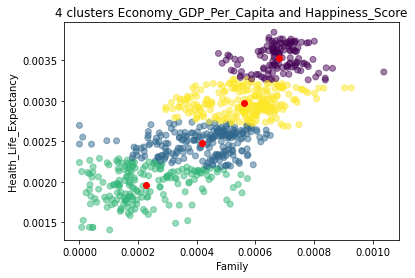

In [64]:
X = data_scaled[["Economy_GDP_Per_Capita","Happiness_Score"]]

kmeans = KMeans(n_clusters=4).fit(X) # se eligen 4 cluster segun lo encontrado en la función codo
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Economy_GDP_Per_Capita'], X['Happiness_Score'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title("4 clusters Economy_GDP_Per_Capita and Happiness_Score")
plt.xlabel("Family")
plt.ylabel("Health_Life_Expectancy")
plt.show()

## NO SIRVE

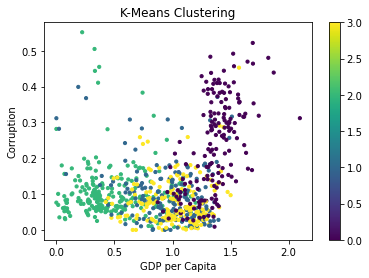

In [48]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy_GDP_Per_Capita'],wh1['Trust_Government_Corruption'],
                     c=dfkmeans[0],s=10)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)